In [41]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200,'display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv('/content/drive/MyDrive/EDA/loan.csv')
# printing data in given form
print(f"original shape -> {df.shape} of data")
df.head()

original shape -> (39717, 111) of data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# **Data Cleaning**
1.   Filter unnecessary data
2.   Removing columns with all NA values
3.   Removing Rows with all NA values
4.   Fix invalid values
5.   Fix missing values
6.   Standardizing values




In [42]:
# We only need to use data from closed loans; loan_status=Current are running loans.
df = df[df["loan_status"] != "Current"]
# Dropping columns and rows with all null values if there are any because they add no value to the data.
df = df.dropna(axis=1, how='all')
print(f"Shape after dropping columns with all null rows -> {df.shape}")
df = df.dropna(axis=0, how='all')
print(f"Shape after dropping rows with all null columns -> {df.shape}")

# removing columns with all the same values if there are any
df = df.loc[:, df.nunique() != 1]
print(f"Shape after dropping columns with non-unique values -> {df.shape}")

Shape after dropping columns with all null rows -> (38577, 56)
Shape after dropping rows with all null columns -> (38577, 56)
Shape after dropping columns with non-unique values -> (38577, 45)


In [43]:
unique_value_cols = df.columns[df.nunique() == df.shape[0]]
print(unique_value_cols)

Index(['id', 'member_id', 'url'], dtype='object')


Columns like id, member_id, and url (which contains member_id) do not add any value in data analysis, so dropping these columns

In [44]:
df = df.drop(unique_value_cols, axis=1)
print(f"Shape after dropping columns with all unique values -> {df.shape}")

Shape after dropping columns with all unique values -> (38577, 42)


In [45]:
import re
df["term"] = df["term"].str.replace("months", "").astype(float)
df["int_rate"] = df["int_rate"].str.replace("%", "").astype(float)
df["revol_util"] = df["revol_util"].str.replace("%", "").astype(float)
df["emp_length"] = df["emp_length"].str.replace(r'[<+]|years?|s', "", regex=True).astype(float)
df['last_pymnt_d_month'], df['last_pymnt_d_year'] = df['last_pymnt_d'].str.split('-').str
df['last_credit_pull_d_month'], df['last_credit_pull_d_year'] = df['last_credit_pull_d'].str.split('-').str
df['earliest_cr_line_month'], df['earliest_cr_line_year'] = df['earliest_cr_line'].str.split('-').str
# zip code is anonimized data so not usefull
df = df.drop(["zip_code",'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d'], axis=1)

In [46]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,"4,975.00",36.00,10.65,162.87,B,B2,NaN,10.00,RENT,"24,000.00",Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,1,NaN,NaN,3,0,13648,83.70,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,0.00,Jan,15,May,16,Jan,85
1,2500,2500,"2,500.00",60.00,15.27,59.83,C,C4,Ryder,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,5,NaN,NaN,3,0,1687,9.40,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,0.00,Apr,13,Sep,13,Apr,99
2,2400,2400,"2,400.00",36.00,15.96,84.33,C,C5,NaN,10.00,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,IL,8.72,0,2,NaN,NaN,2,0,2956,98.50,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,0.00,Jun,14,May,16,Nov,01
3,10000,10000,"10,000.00",36.00,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.00,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,1,35.00,NaN,10,0,5598,21.00,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,0.00,Jan,15,Apr,16,Feb,96
5,5000,5000,"5,000.00",36.00,7.90,156.46,A,A4,Veolia Transportaton,3.00,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,3,NaN,NaN,9,0,7963,28.30,12,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,161.03,0.00,Jan,15,Jan,16,Nov,04


In [47]:
def get_missing_value_details(data_frame):
  missing_cols = data_frame.isnull().sum()
  missing_cols_percent = missing_cols / len(data_frame) * 100

  missing_data = pd.DataFrame({
      'count': missing_cols,
      'percent': missing_cols_percent,
      'median': data_frame.median()
  })
  missing_data = missing_data[missing_data['count'] != 0]
  return missing_data.sort_values('count', ascending=False)

In [48]:
get_missing_value_details(df)

,count,percent,median
mths_since_last_record,35837,92.90,90.00
mths_since_last_delinq,24905,64.56,34.00
desc,12527,32.47,NaN
emp_title,2386,6.19,NaN
emp_length,1033,2.68,4.00
pub_rec_bankruptcies,697,1.81,0.00
last_pymnt_d_month,71,0.18,NaN
last_pymnt_d_year,71,0.18,13.00
revol_util,50,0.13,49.10
title,11,0.03,NaN


In [49]:
# dropping columns with more than 30% missing values
df = df.drop(columns=["mths_since_last_record", "mths_since_last_delinq", "desc"])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,"4,975.00",36.00,10.65,162.87,B,B2,NaN,10.00,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,0.00,Jan,15,May,16,Jan,85
1,2500,2500,"2,500.00",60.00,15.27,59.83,C,C4,Ryder,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,0.00,Apr,13,Sep,13,Apr,99
2,2400,2400,"2,400.00",36.00,15.96,84.33,C,C5,NaN,10.00,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,0.00,Jun,14,May,16,Nov,01
3,10000,10000,"10,000.00",36.00,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.00,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21.00,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,0.00,Jan,15,Apr,16,Feb,96
5,5000,5000,"5,000.00",36.00,7.90,156.46,A,A4,Veolia Transportaton,3.00,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,3,9,0,7963,28.30,12,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,161.03,0.00,Jan,15,Jan,16,Nov,04


In [50]:
df[['emp_title', 'emp_length', 'pub_rec_bankruptcies']].info()
df[['emp_title', 'emp_length', 'pub_rec_bankruptcies']].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   emp_title             36191 non-null  object 
 1   emp_length            37544 non-null  float64
 2   pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


emp_title               28027
emp_length                 10
pub_rec_bankruptcies        3
dtype: int64

We can drop the emp_title column because we can't extract useful data with so many distinct string values.

In [51]:
df = df.drop('emp_title', axis=1)

Majority of the null values has been removed, now we will handle the remaining missing values.

In [52]:
get_missing_value_details(df)

,count,percent,median
emp_length,1033,2.68,4.00
pub_rec_bankruptcies,697,1.81,0.00
last_pymnt_d_month,71,0.18,NaN
last_pymnt_d_year,71,0.18,13.00
revol_util,50,0.13,49.10
title,11,0.03,NaN
last_credit_pull_d_month,2,0.01,NaN
last_credit_pull_d_year,2,0.01,15.00


In [53]:
df['emp_length'].fillna(value=df['emp_length'].median(), inplace=True)
df['pub_rec_bankruptcies'].fillna(value=df['pub_rec_bankruptcies'].median(), inplace=True)
df['last_pymnt_d_year'].fillna(value=df['last_pymnt_d_year'].median(), inplace=True)
df['revol_util'].fillna(value=df['revol_util'].median(), inplace=True)
df['last_credit_pull_d_year'].fillna(value=df['last_credit_pull_d_year'].median(), inplace=True)

In [54]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,"4,975.00",36.00,10.65,162.87,B,B2,10.00,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,13648,83.70,9,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,171.62,0.00,Jan,15,May,16,Jan,85
1,2500,2500,"2,500.00",60.00,15.27,59.83,C,C4,1.00,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,1687,9.40,4,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,119.66,0.00,Apr,13,Sep,13,Apr,99
2,2400,2400,"2,400.00",36.00,15.96,84.33,C,C5,10.00,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,2956,98.50,10,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,649.91,0.00,Jun,14,May,16,Nov,01
3,10000,10000,"10,000.00",36.00,13.49,339.31,C,C1,10.00,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,5598,21.00,37,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,357.48,0.00,Jan,15,Apr,16,Feb,96
5,5000,5000,"5,000.00",36.00,7.90,156.46,A,A4,3.00,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,3,9,0,7963,28.30,12,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,161.03,0.00,Jan,15,Jan,16,Nov,04


In [55]:
quantitative_columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'term','int_rate','installment', 'emp_length','annual_inc','dti',
                        'delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv',
                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
                        'last_pymnt_d_year', 'last_credit_pull_d_year', 'earliest_cr_line_year']
df[quantitative_columns] = df[quantitative_columns].astype(float)

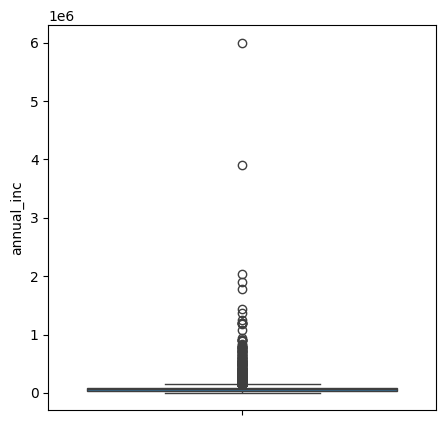

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
25%        40,000.00
50%        58,868.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [56]:
# annual_inc has a high level of outliers, so removing a few outliers will help to clean the data.
plt.figure(figsize=(5,5))
sns.boxplot(df['annual_inc'])
plt.show()
df['annual_inc'].describe()

In [57]:
#Annual_inc outliers have been removed based on the.95 quantile since they seem to be distinct from the remaining part of the data.
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.95)]

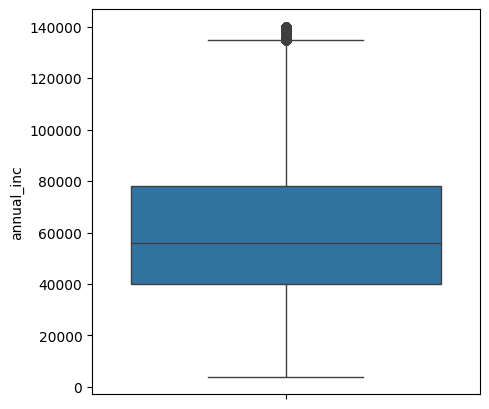

In [58]:
# plot after cleaning outliers in income
plt.figure(figsize=(5,5))
sns.boxplot(df['annual_inc'])
plt.show()

## Analysis

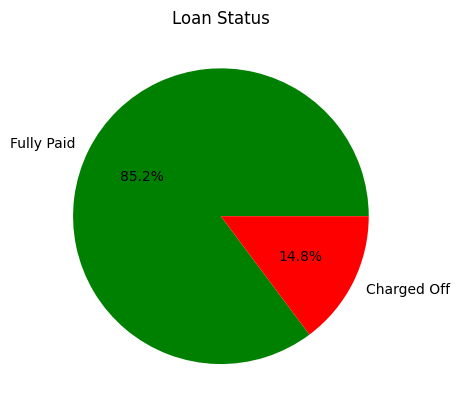

In [59]:
# Pie chart of loan_status with read and green colour

loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Loan Status')
plt.show()


### **Insight :**  Chart shows that 85.2% of the loans have been fully paid and 14.8% have been charged off

<Figure size 1000x600 with 0 Axes>

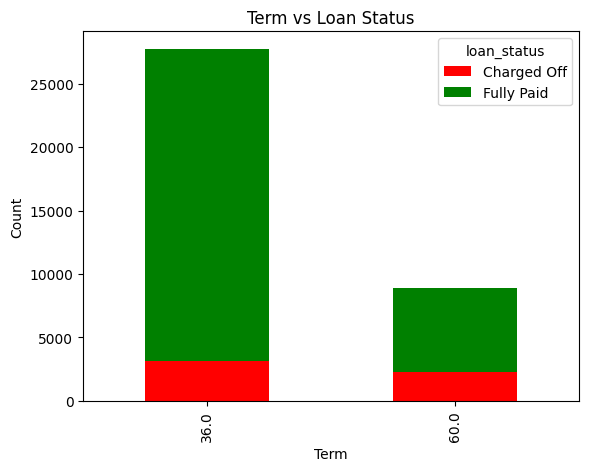

In [60]:
term_loan_status = pd.crosstab(df['term'], df['loan_status'])
plt.figure(figsize=(10, 6))
term_loan_status.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term vs Loan Status')
plt.show()

### **Insight :** The above chart illustrates how the percentage of "Charged Off" is significantly higher when the term is 60 months


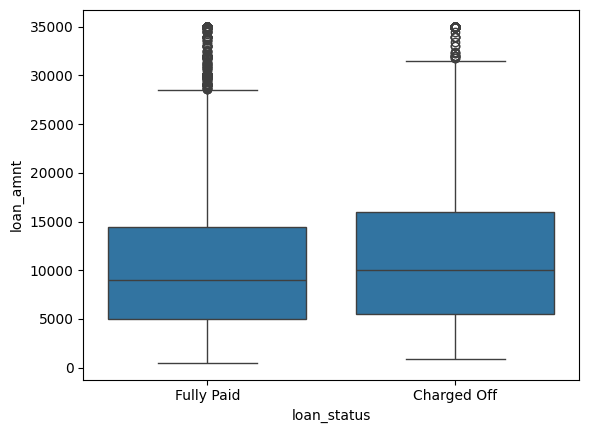

In [61]:
# Distribution of different loan_status with loan_amnt
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.show()

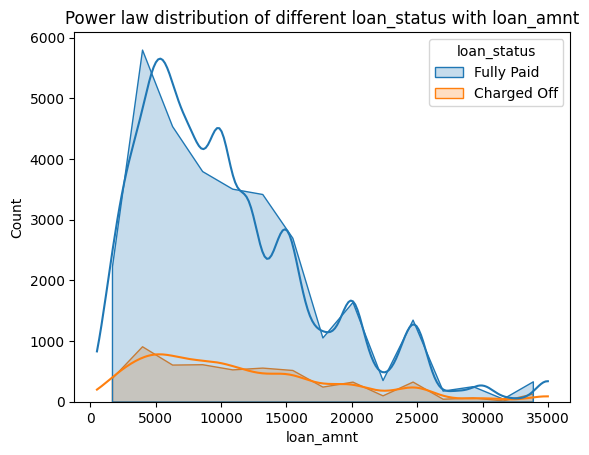

In [62]:
sns.histplot(data=df, x="loan_amnt", hue="loan_status", kde=True, bins=15, element="poly")
plt.title('Power law distribution of different loan_status with loan_amnt')
plt.show()

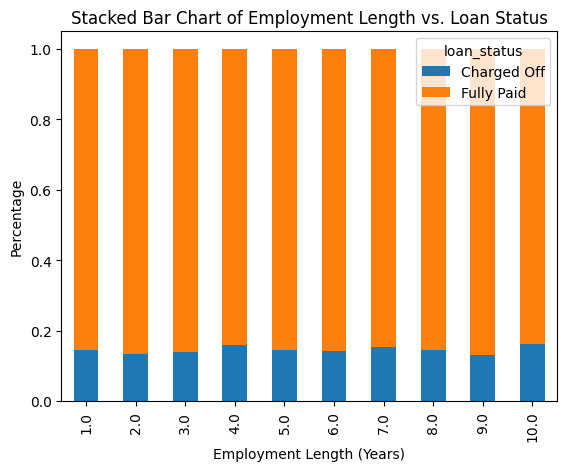

In [63]:
# Create a crosstab table of emp_length_num and loan_status
crosstab = pd.crosstab(df['emp_length'], df['loan_status'])

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True)
# Set labels and title
plt.xlabel('Employment Length (Years)')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Employment Length vs. Loan Status')
# Show the plot
plt.show()


### **Insight :** The chart above shows that there is no significant difference in emp_lenigh and loan repayment capacity.

Note: We have changed values (1,<1) to 1 and (10,10+) to 10

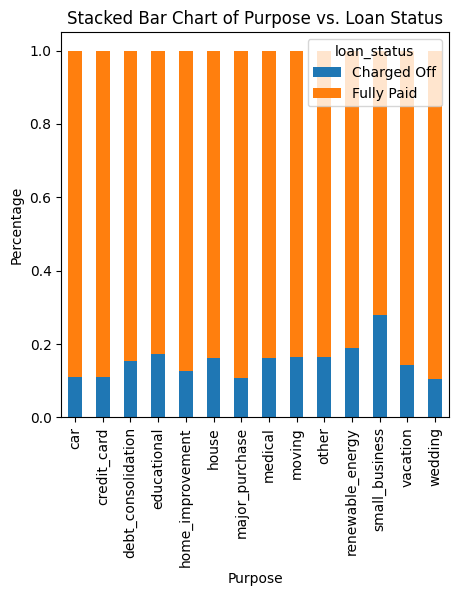

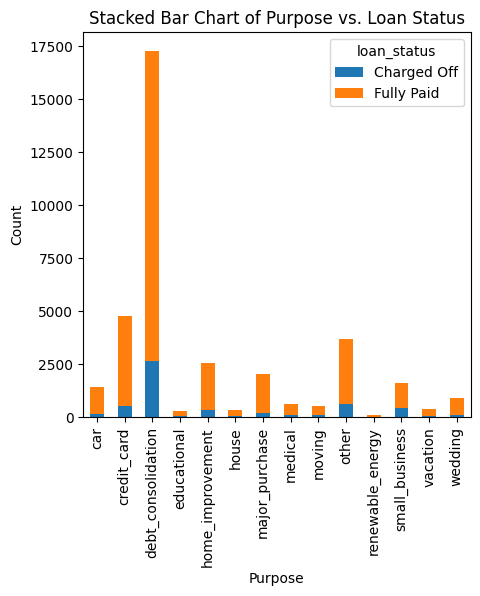

loan_status,Charged Off,Fully Paid
purpose,,
wedding,0.10,0.90
major_purchase,0.11,0.89
credit_card,0.11,0.89
car,0.11,0.89
home_improvement,0.13,0.87
vacation,0.14,0.86
debt_consolidation,0.15,0.85
medical,0.16,0.84
house,0.16,0.84


In [64]:
# Create a crosstab table of purpose and loan_status
crosstab = pd.crosstab(df['purpose'], df['loan_status'])
# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True, figsize=(5,5))
# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Purpose vs. Loan Status')
# Show the plot
plt.show()

# Create a crosstab table of purpose and loan_status
crosstab = pd.crosstab(df['purpose'], df['loan_status'])
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(5,5))
# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Purpose vs. Loan Status')
# Show the plot
plt.show()
crosstab_pct.sort_values('Charged Off')

### **Insight :** After looking at both above bar charts, we can say that even though loan taken for debt_consolidation has the most loans taken, but loan taken by small businesses have the highest default rate.

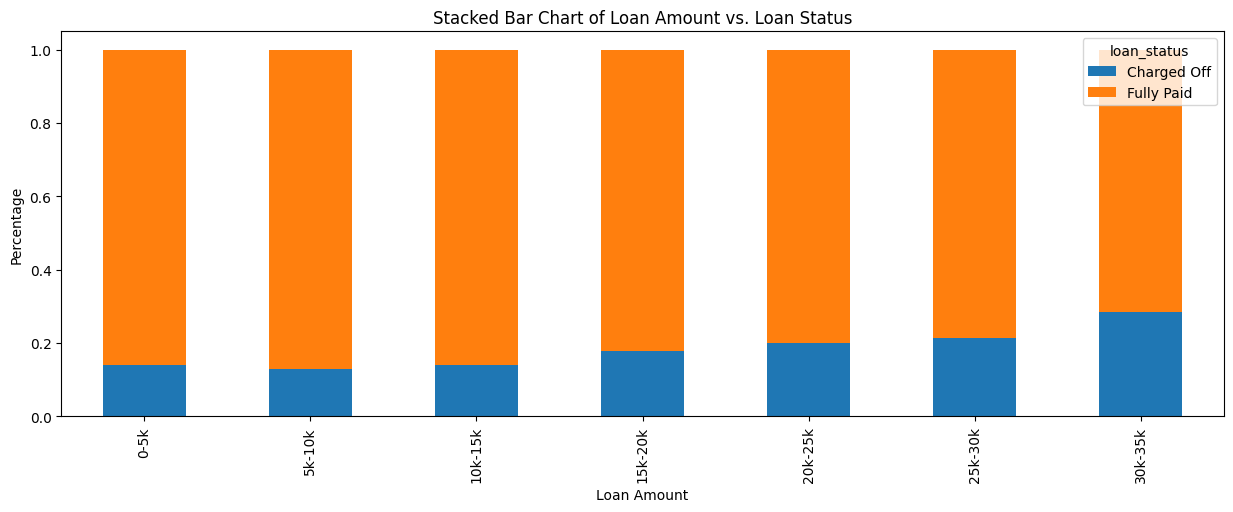

loan_status,Charged Off,Fully Paid
loan_amnt,,
30k-35k,0.29,0.71
25k-30k,0.21,0.79
20k-25k,0.20,0.80
15k-20k,0.18,0.82
10k-15k,0.14,0.86
0-5k,0.14,0.86
5k-10k,0.13,0.87


In [65]:
# Create bins for loan_amnt
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-55k', '55k-60k', '60k-65k', '65k-70k', '70k-75k', '75k-80k', '80k-85k', '85k-90k', '90k-95k', '95k-100k']

# Create a crosstab table of loan_amnt and loan_status
crosstab = pd.crosstab(pd.cut(df['loan_amnt'], bins, labels=labels), df['loan_status'])

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True, figsize=(15, 5))

# Set labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Loan Amount vs. Loan Status')

# Show the plot
plt.show()
crosstab_pct.sort_values('Charged Off', ascending=False)

### **Insight :** This pattern shows that as the loan_amount increases, the chances of the customer defaulting also increase

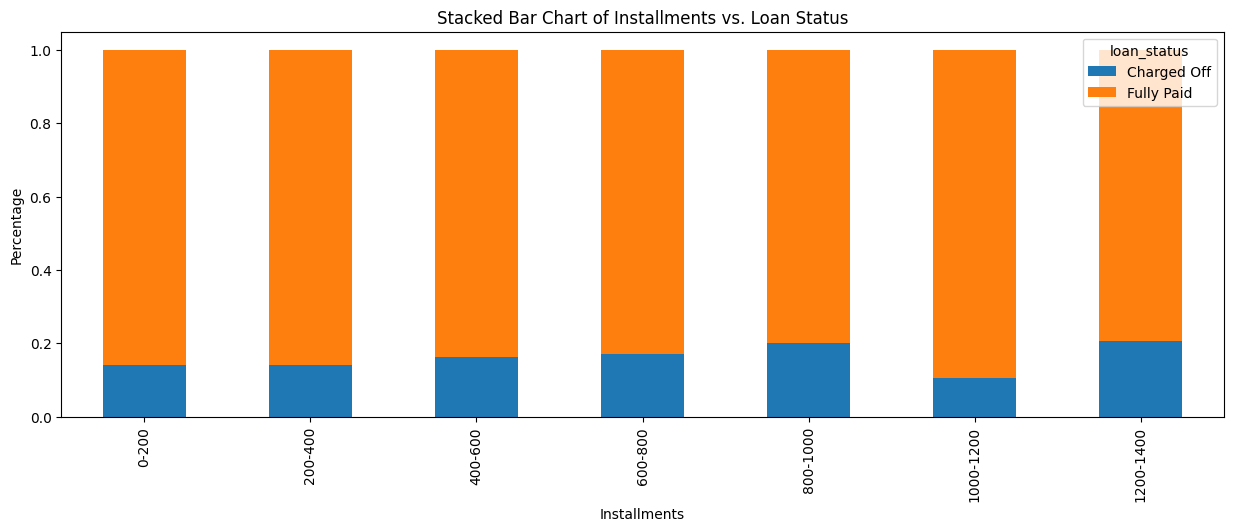

loan_status,Charged Off,Fully Paid
installment,,
1200-1400,0.21,0.79
800-1000,0.20,0.80
600-800,0.17,0.83
400-600,0.16,0.84
200-400,0.14,0.86
0-200,0.14,0.86
1000-1200,0.11,0.89


In [66]:
# Create bins for installments
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000']

# Create a crosstab table of installments and loan_status
crosstab = pd.crosstab(pd.cut(df['installment'], bins, labels=labels), df['loan_status'])

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True, figsize=(15, 5))

# Set labels and title
plt.xlabel('Installments')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Installments vs. Loan Status')

# Show the plot
plt.show()
crosstab_pct.sort_values('Charged Off', ascending=False)

### **Insight :** This pattern shows that as the loan instalment amount increases, the chances of the customer defaulting also increase

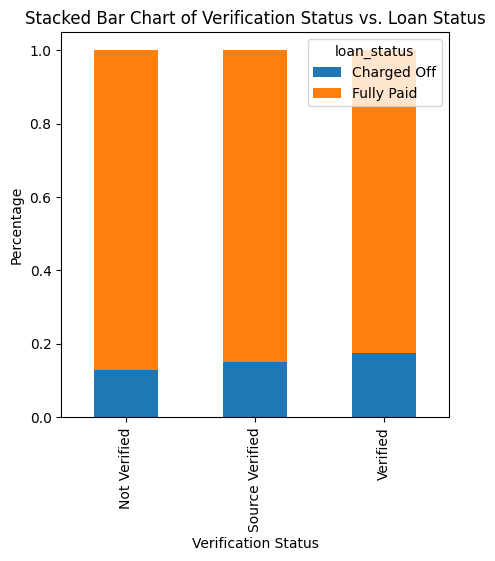

loan_status,Charged Off,Fully Paid
verification_status,,
Verified,0.17,0.83
Source Verified,0.15,0.85
Not Verified,0.13,0.87


In [67]:
# Create a crosstab table of verification_status and loan_status
crosstab = pd.crosstab(df['verification_status'], df['loan_status'])

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True, figsize=(5, 5))

# Set labels and title
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Verification Status vs. Loan Status')

# Show the plot
plt.show()
crosstab_pct.sort_values('Charged Off', ascending=False)


### **Insight :** Customers with verified income are more likely to default than others

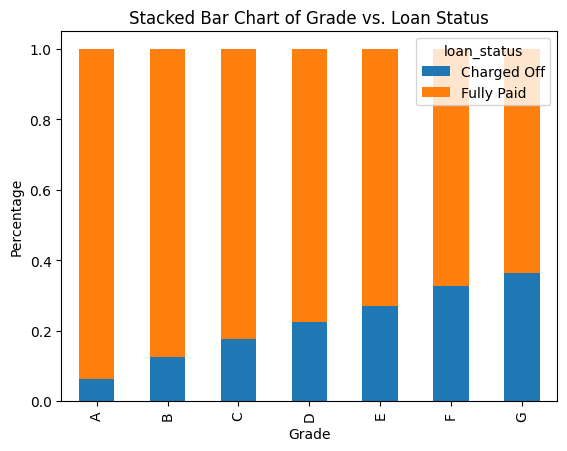

In [68]:
crosstab = pd.crosstab(df['grade'], df['loan_status'])
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_pct.plot(kind='bar', stacked=True)
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Grade vs. Loan Status')
plt.show()


### **Insight :** Loans with G grade are more likely to default than other grade loans.

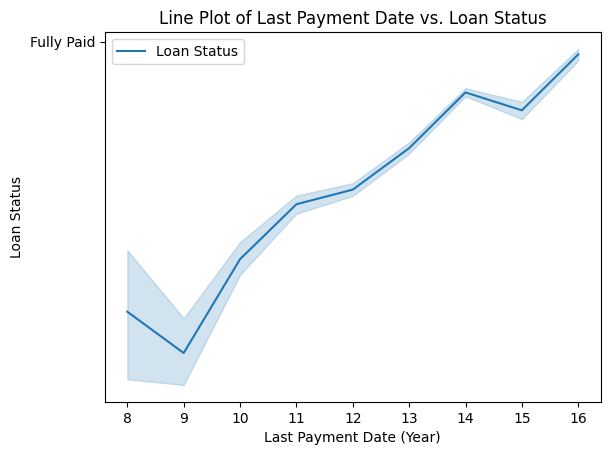

In [69]:
# line plot of last payment date against loan_status

sns.lineplot(data=df, x="last_pymnt_d_year", y="loan_status", label="Loan Status")
plt.xlabel("Last Payment Date (Year)")
plt.ylabel("Loan Status")
plt.title("Line Plot of Last Payment Date vs. Loan Status")
plt.show()


### **Insight :** Over the year, defaulters rate is decreasing, and more customers are paying loans.

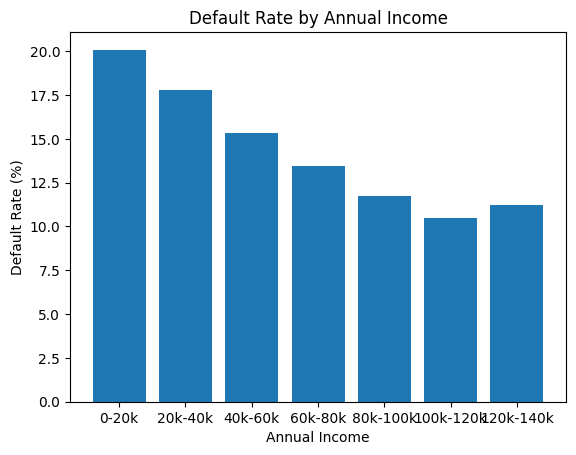

In [70]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k']
df['annual_inc_bin'] = pd.cut(df['annual_inc'], bins, labels=labels)
charged_off_count = df.groupby('annual_inc_bin')['loan_status'].apply(lambda x: (x == 'Charged Off').sum())
total_count = df.groupby('annual_inc_bin')['loan_status'].count()
default_rate = (charged_off_count / total_count) * 100
plt.bar(default_rate.index, default_rate.values)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Annual Income')
plt.show()


### **Insight :** Higher the salary, Customer is less likely to default on the loan.

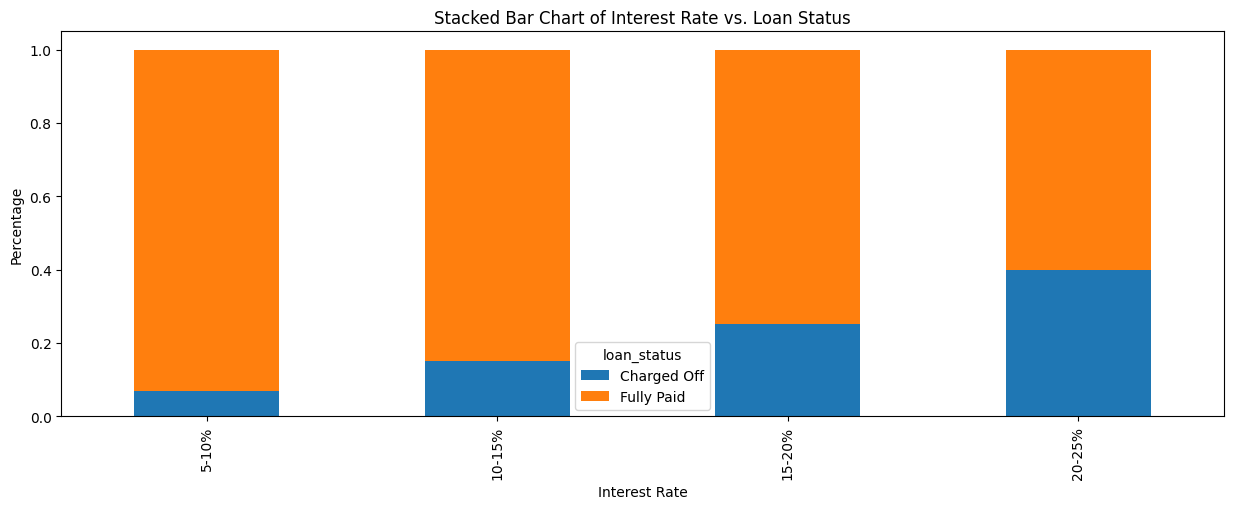

In [71]:
# prompt: Defaulter rate with int_rate chart

# Create bins for int_rate
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%']

# Create a crosstab table of int_rate and loan_status
crosstab = pd.crosstab(pd.cut(df['int_rate'], bins, labels=labels), df['loan_status'])

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Plot the stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True, figsize=(15, 5))

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Interest Rate vs. Loan Status')

# Show the plot
plt.show()


### **Insight :** Higher the interest rates, Customer is more likely to default on the loan.

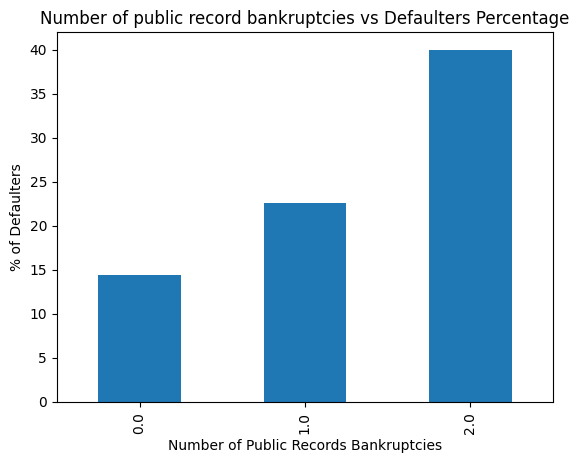

In [72]:
# Calculate the percentage of defaulters for each value of pub_rec_bankruptcies
defaulters_by_bankruptcy = (
    df.groupby('pub_rec_bankruptcies')['loan_status']
    .apply(lambda x: (x == 'Charged Off').sum() / len(x) * 100)
)

# Create a bar chart to visualize the results
defaulters_by_bankruptcy.plot(kind='bar')
plt.xlabel('Number of Public Records Bankruptcies')
plt.ylabel('% of Defaulters')
plt.title('Number of public record bankruptcies vs Defaulters Percentage')
plt.show()


### **Insight :** Customers who have a past bankruptcy record are more likely to default on loan